In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from statsmodels.stats.multitest import multipletests

In [2]:
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]

In [3]:
data

,Name,Sequence,AG876,B95-8,GD1,Cao,Raji,P3HR-1,HEALTHY_01,HEALTHY_02,HEALTHY_03,HEALTHY_04,HEALTHY_05,HEALTHY_06,HEALTHY_07,HEALTHY_08,HEALTHY_09,HEALTHY_10,HEALTHY_11,HEALTHY_12,HEALTHY_13,HEALTHY_14,HEALTHY_15,HEALTHY_16,HEALTHY_17,HEALTHY_18,HEALTHY_19,HEALTHY_20,HEALTHY_21,HEALTHY_22,HEALTHY_23,HEALTHY_24,HEALTHY_25,HEALTHY_26,HEALTHY_27,HEALTHY_28,HEALTHY_29,HEALTHY_30,HEALTHY_31,HEALTHY_32,HEALTHY_33,HEALTHY_34,HEALTHY_35,HEALTHY_36,HEALTHY_37,HEALTHY_38,HEALTHY_39,HEALTHY_40,HEALTHY_41,HEALTHY_42,HEALTHY_43,HEALTHY_44,HEALTHY_45,HEALTHY_46,HEALTHY_47,HEALTHY_48,HEALTHY_49,HEALTHY_50,CFS_01,CFS_02,CFS_03,CFS_04,CFS_05,CFS_06,CFS_07,CFS_08,CFS_09,CFS_10,CFS_11,CFS_12,CFS_13,CFS_14,CFS_15,CFS_16,CFS_17,CFS_18,CFS_19,CFS_20,CFS_21,CFS_22,CFS_23,CFS_24,CFS_25,CFS_26,CFS_27,CFS_28,CFS_29,CFS_30,CFS_31,CFS_32,CFS_33,CFS_34,CFS_35,CFS_36,CFS_37,CFS_38,CFS_39,CFS_40,CFS_41,CFS_42,CFS_43,CFS_44,CFS_45,CFS_46,CFS_47,CFS_48,CFS_49,CFS_50,CFS_51,CFS_52,CFS_53,CFS_54,CFS_55,CFS_56,CFS_57,CFS_58,CFS_59,CFS_60,CFS_61,CFS_62,CFS_63,CFS_64,CFS_65,CFS_66,CFS_67,CFS_68,CFS_69,CFS_70,CFS_71,CFS_72,CFS_73,CFS_74,CFS_75,CFS_76,CFS_77,CFS_78,CFS_79,CFS_80,CFS_81,CFS_82,CFS_83,CFS_84,CFS_85,CFS_86,CFS_87,CFS_88,CFS_89,CFS_90,CFS_91,CFS_92
1254,00_EBV_EBNA1_0415,FEYHQEGGPDGEPDM,x,NaN,NaN,NaN,NaN,NaN,951.666667,9077.666667,1175.333333,3059.333333,60380.666670,1168.000000,1502.333333,973.000000,1155.000000,818.666667,967.333333,1152.666667,940.000000,1538.666667,1182.333333,1106.666667,2109.666667,1087.333333,935.333333,792.000000,2380.666667,986.000000,845.000000,853.000000,976.333333,1008.333333,839.666667,827.000000,966.000000,7657.500000,784.333333,910.333333,1113.000000,875.333333,987.000000,971.000000,1001.000000,1163.333333,759.000000,904.000000,840.000000,1054.333333,1045.333333,1690.666667,1112.666667,1424.000000,1788.333333,52787.000000,12932.666670,1472.333333,1003.000000,966.000000,1106.333333,1155.666667,1186.000000,980.000000,1316.000000,1186.333333,61345.333330,1250.333333,776.000000,915.666667,1126.333333,930.333333,1340.666667,1247.666667,1179.666667,7486.000000,1003.333333,1071.333333,942.666667,1614.000000,1035.333333,1009.000000,1042.333333,1254.000000,1088.333333,2449.000000,891.000000,1402.000000,1043.000000,1138.666667,1370.000000,848.333333,7943.000000,59555.333330,1003.333333,1387.333333,851.666667,2501.000000,849.000000,1060.000000,875.666667,1133.333333,1133.333333,3661.666667,1216.333333,1296.333333,1669.666667,975.000000,1112.000000,1161.000000,59809.666670,1377.000000,7521.000000,1123.000000,1288.000000,943.000000,832.666667,1321.666667,974.666667,997.666667,708.000000,1600.333333,836.333333,1148.666667,1495.666667,1252.000000,51375.666670,40033.333330,908.333333,1178.666667,1818.333333,1335.666667,1202.000000,1531.000000,1239.000000,840.666667,1032.666667,3509.333333,1211.000000,1243.666667,1213.000000,3979.666667,2910.333333,1310.333333,1110.666667,1708.666667,1138.666667,1338.333333,1564.666667,1025.333333
1255,00_EBV_EBNA1_0415,FEYHQEGGPDGEPDV,NaN,x,NaN,NaN,NaN,NaN,1044.666667,14721.333330,1443.000000,3295.000000,63598.000000,1180.000000,1790.000000,1204.666667,1250.333333,864.000000,1499.666667,1297.666667,1137.666667,1647.666667,1324.000000,1198.000000,2446.666667,1209.666667,1300.333333,878.000000,3523.666667,1604.333333,838.666667,931.000000,939.000000,1302.000000,991.666667,1274.666667,1219.666667,5494.333333,881.666667,999.666667,1176.666667,905.666667,1259.333333,1084.000000,1179.666667,1583.666667,936.000000,904.333333,855.333333,1259.000000,2074.666667,1710.666667,1227.000000,2582.666667,1971.333333,55498.333330,18511.000000,1576.333333,1292.000000,964.333333,1847.333333,2246.666667,1047.333333,999.000000,1562.000000,1367.000000,62495.666670,1599.000000,979.666667,1171.666667,1497.000000,978.000000,1370.666667,1584.666667,1295.333333,5482.666667,1265.666667,1044.666667,984.333333,1798.666667,1217.000000,1058.666667,1313.000000,1686.333333,1204.000000,2175.333333,982.000000,2087.333333,1106.666667,1368.333

# Signals

In [4]:
smr, all_lower_bounds, all_p_values, auc, gini = summarize_df(data, 8, 58)

**Chi-squared**

In [5]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

,ID,minimum p-value,lower bound,upper bound
0,EBNA1_0415 (AG876),0.004892,1001.000,1003.000
1,EBNA1_0415 (B95-8),0.015897,939.000,963.333
2,EBNA1_0419 (AG876),0.017142,780.667,783.667
3,"EBNA1_0419 (B95-8, GD1)",0.004892,985.000,999.333
4,EBNA1_0423 (AG876),0.013764,821.000,828.500
5,"EBNA1_0423 (B95-8, GD1)",0.002855,905.000,913.000
6,EBNA1_0427 (GD1),0.027957,928.667,949.333
7,"EBNA1_0430 (AG876, B95-8)",0.016304,873.667,889.333
8,EBNA1_0431 (GD1),0.000261,933.000,933.667
9,"EBNA1_0434 (AG876, B95-8)",0.000635,923.333,929.333


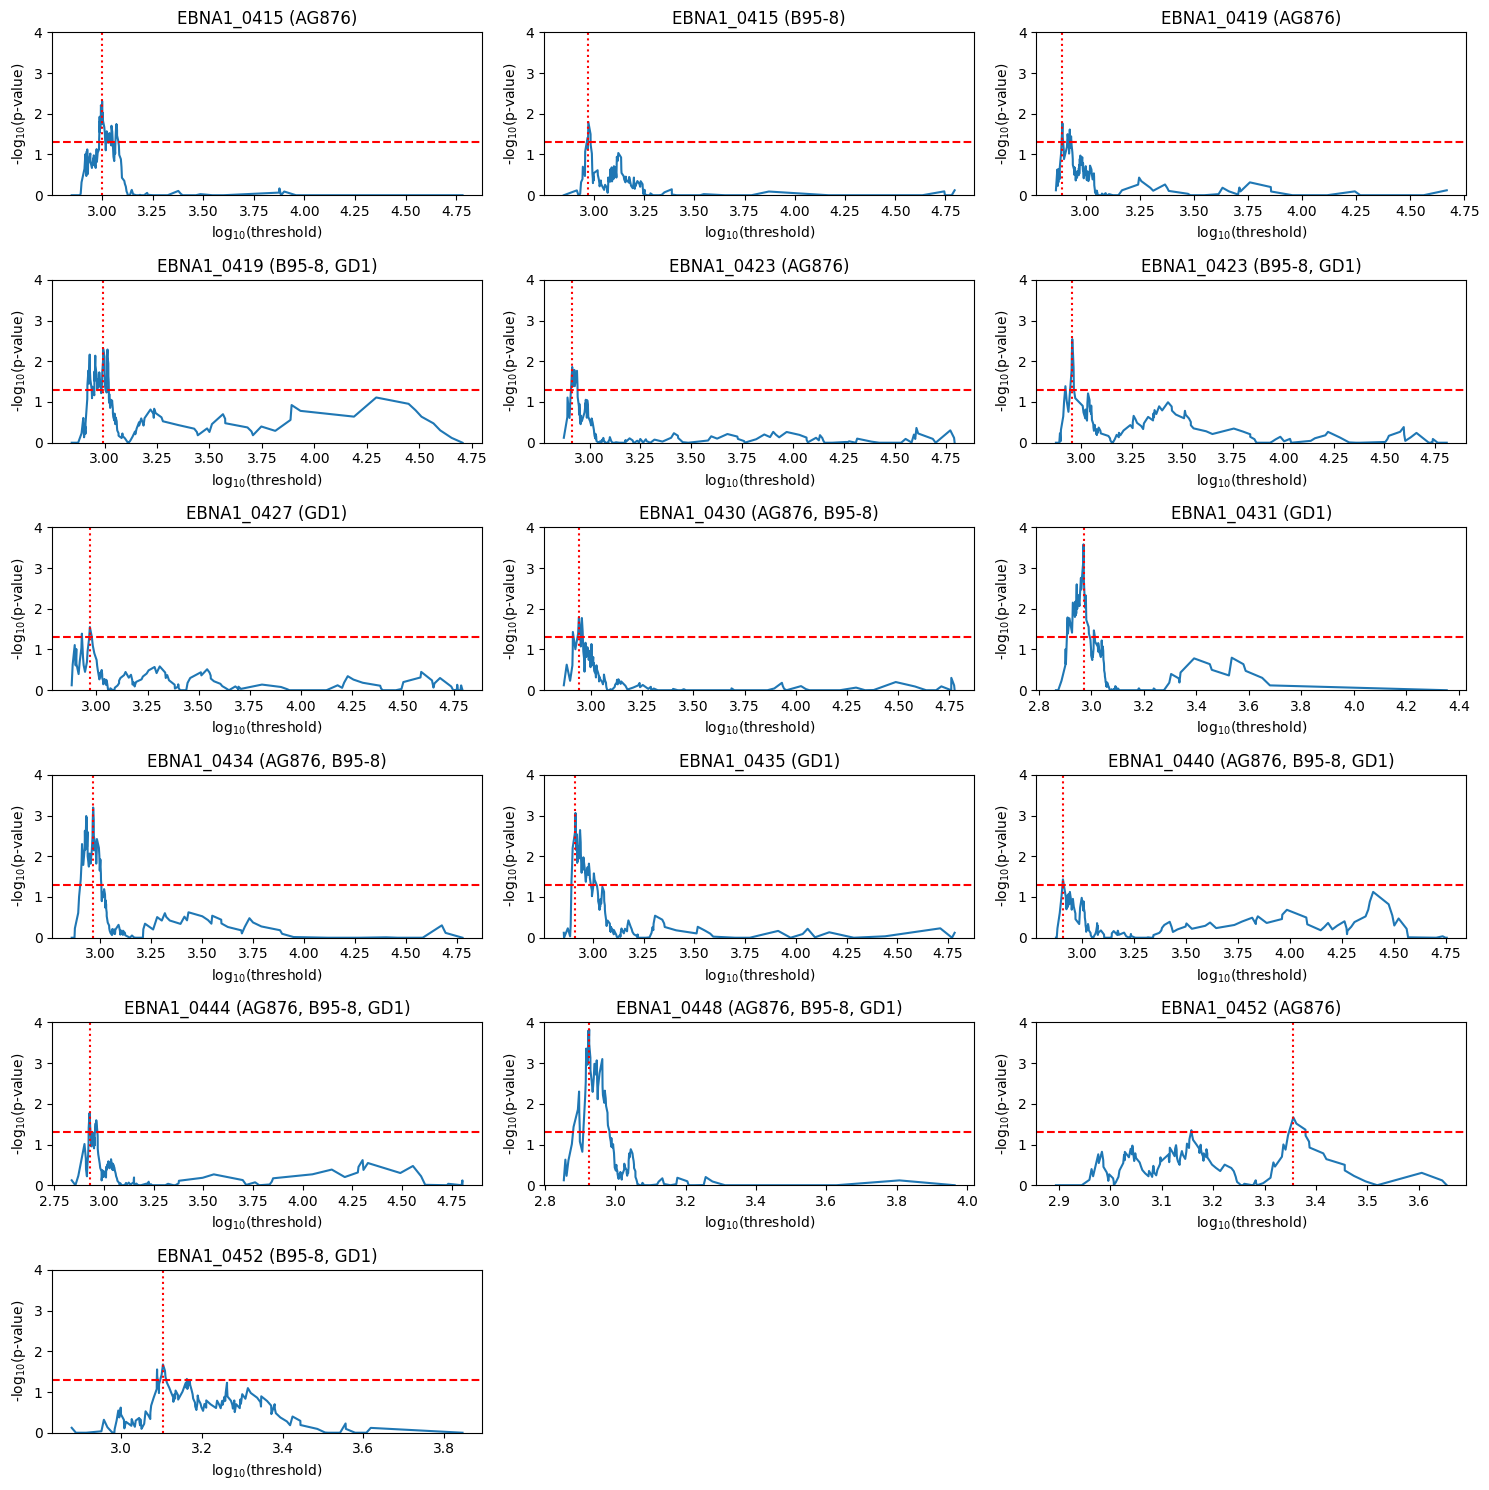

In [6]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**AUC**

In [7]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

,ID,maximum AUC,lower bound,upper bound
0,EBNA1_0415 (AG876),0.621304,1001.000,1003.000
1,EBNA1_0415 (B95-8),0.581739,1324.000,1367.000
2,EBNA1_0419 (AG876),0.576522,844.000,845.667
3,"EBNA1_0419 (B95-8, GD1)",0.627826,1033.333,1034.000
4,EBNA1_0423 (AG876),0.568478,973.000,981.000
5,"EBNA1_0423 (B95-8, GD1)",0.588261,905.000,913.000
6,EBNA1_0427 (GD1),0.571957,928.667,949.333
7,"EBNA1_0430 (AG876, B95-8)",0.576739,1006.667,1009.667
8,EBNA1_0431 (GD1),0.640217,933.000,933.667
9,"EBNA1_0434 (AG876, B95-8)",0.630217,923.333,929.333


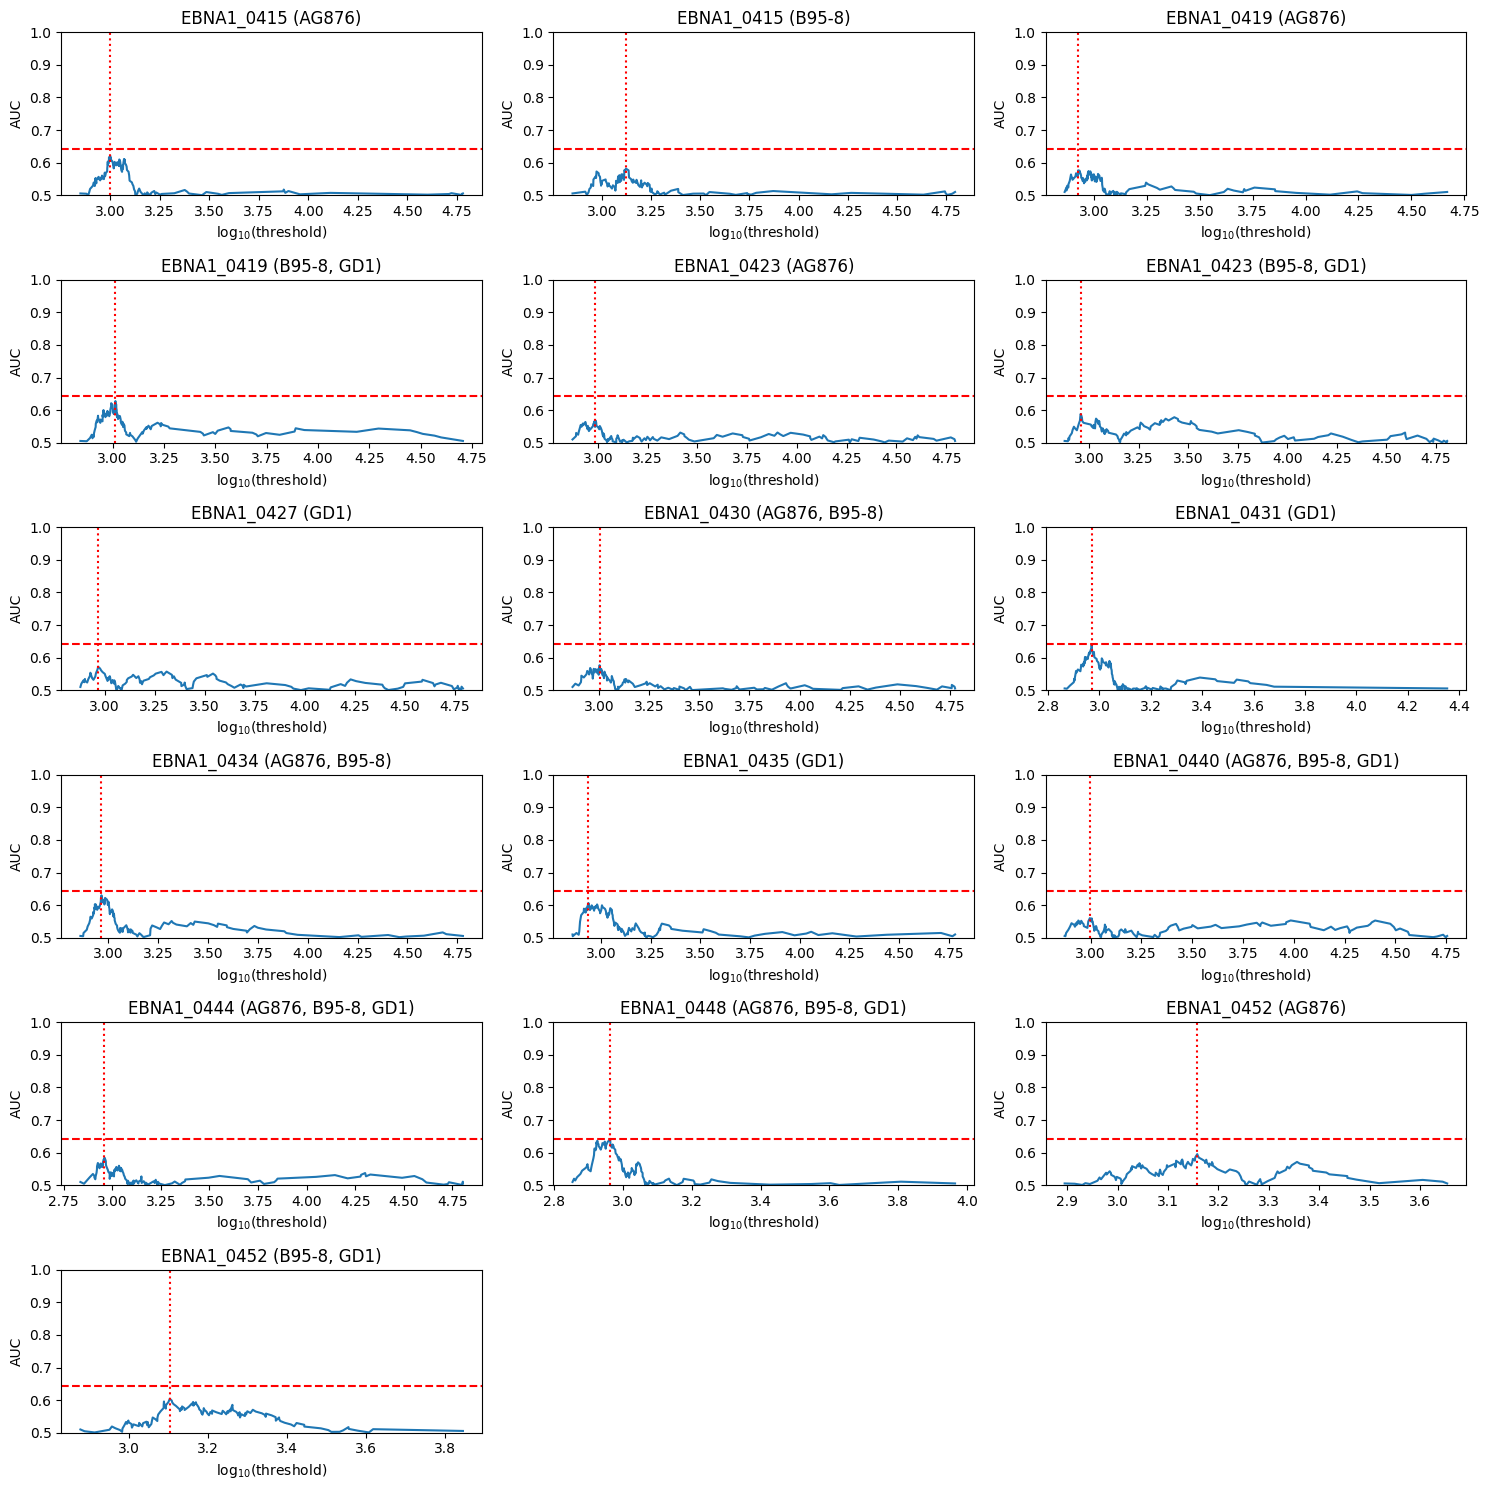

In [8]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [9]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

,ID,maximum Gini decrease,lower bound,upper bound
0,EBNA1_0415 (AG876),0.029019,1001.000,1003.000
1,EBNA1_0415 (B95-8),0.023373,939.000,963.333
2,EBNA1_0419 (AG876),0.023637,780.667,783.667
3,"EBNA1_0419 (B95-8, GD1)",0.029019,985.000,999.333
4,EBNA1_0423 (AG876),0.026450,821.000,828.500
5,"EBNA1_0423 (B95-8, GD1)",0.034330,905.000,913.000
6,EBNA1_0427 (GD1),0.019475,928.667,949.333
7,"EBNA1_0430 (AG876, B95-8)",0.024522,873.667,889.333
8,EBNA1_0431 (GD1),0.047968,933.000,933.667
9,"EBNA1_0434 (AG876, B95-8)",0.042367,923.333,929.333


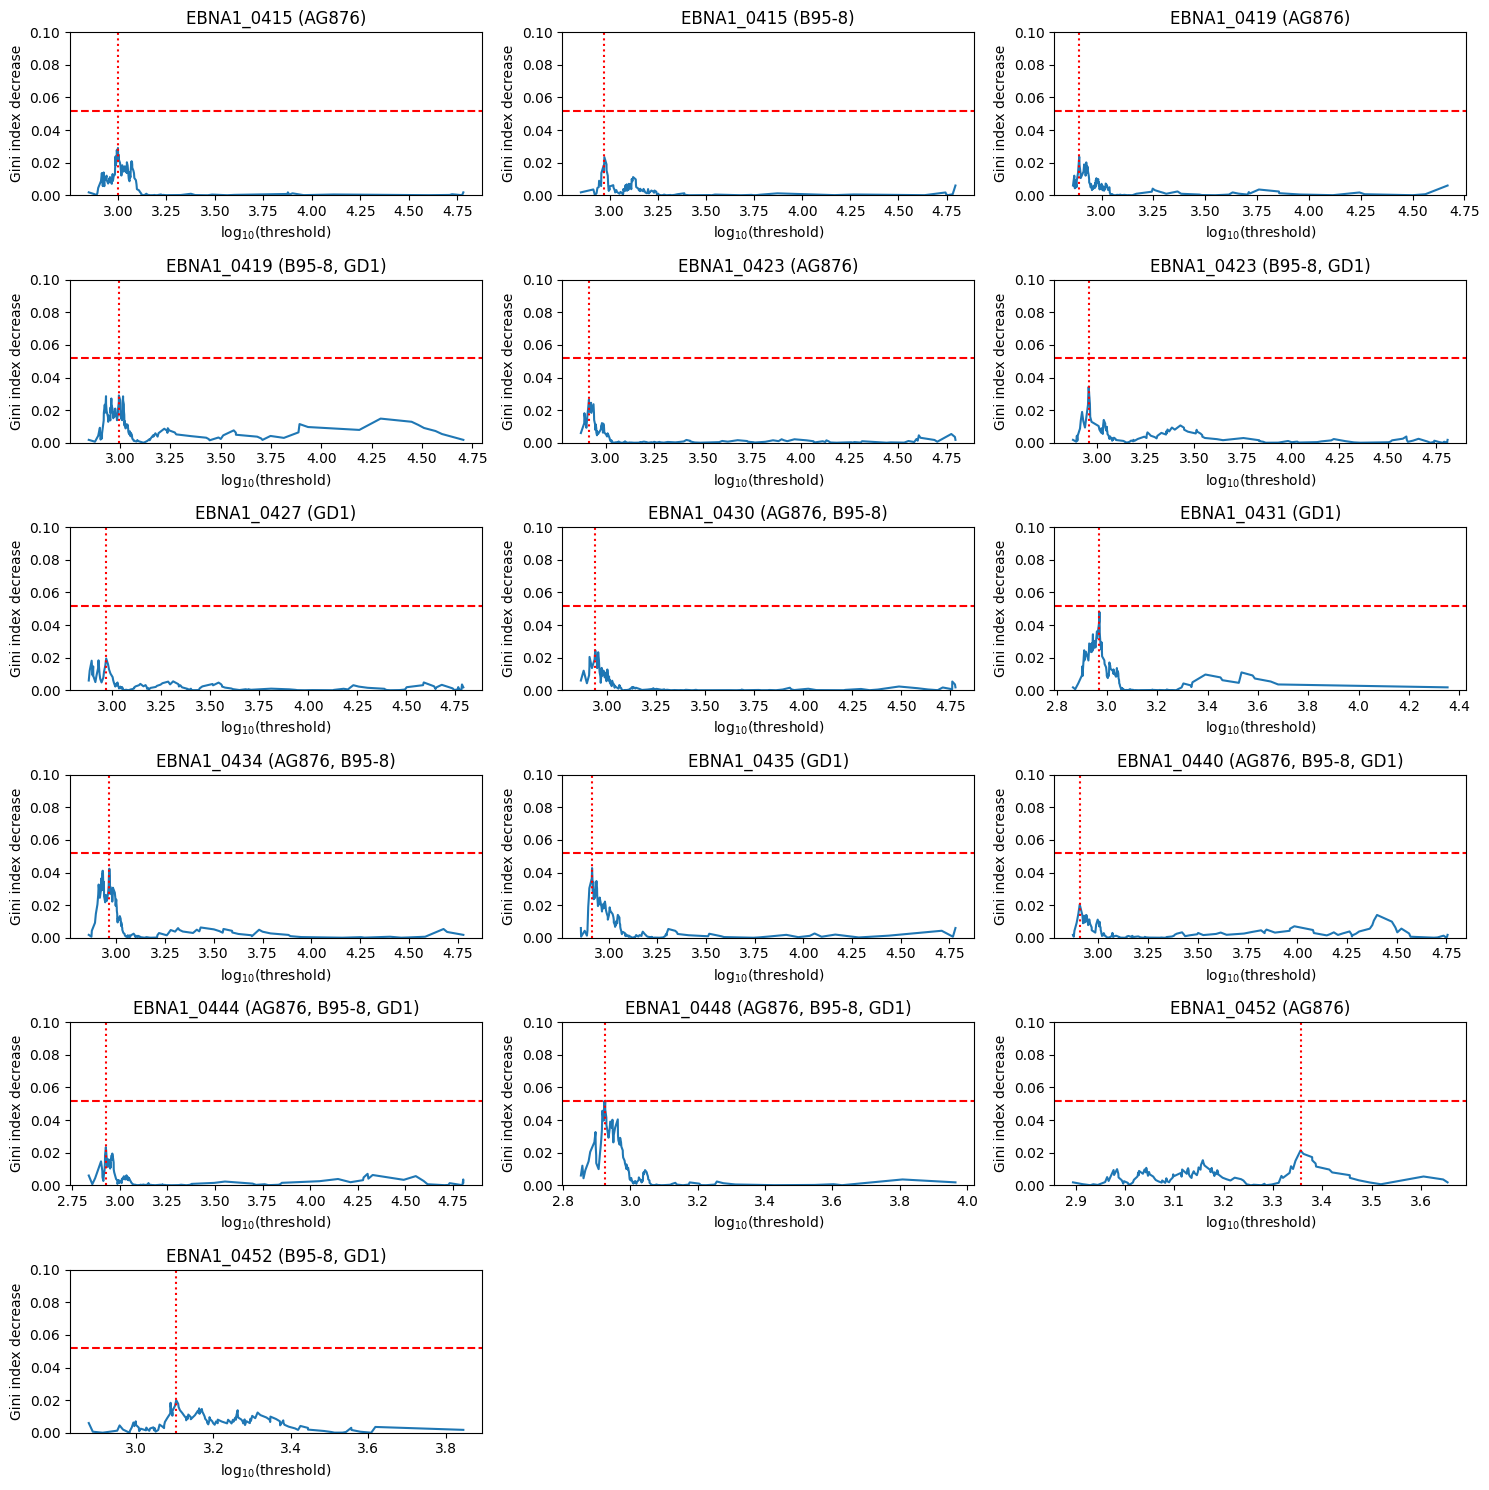

In [10]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [11]:
thr_p_value = np.round(smr.test_lower_bound, 2).astype(str) + ' - ' + np.round(smr.test_upper_bound, 2).astype(str)
thr_auc = np.round(smr.auc_lower_bound, 2).astype(str) + ' - ' + np.round(smr.auc_upper_bound, 2).astype(str)
thr_gini = np.round(smr.gini_lower_bound, 2).astype(str) + ' - ' + np.round(smr.gini_upper_bound, 2).astype(str)
pd.DataFrame({'ID': smr.name, 'Chi-squared': thr_p_value, 'AUC': thr_auc, 'Gini': thr_gini})

,ID,Chi-squared,AUC,Gini
0,EBNA1_0415 (AG876),1001.0 - 1003.0,1001.0 - 1003.0,1001.0 - 1003.0
1,EBNA1_0415 (B95-8),939.0 - 963.33,1324.0 - 1367.0,939.0 - 963.33
2,EBNA1_0419 (AG876),780.67 - 783.67,844.0 - 845.67,780.67 - 783.67
3,"EBNA1_0419 (B95-8, GD1)",985.0 - 999.33,1033.33 - 1034.0,985.0 - 999.33
4,EBNA1_0423 (AG876),821.0 - 828.5,973.0 - 981.0,821.0 - 828.5
5,"EBNA1_0423 (B95-8, GD1)",905.0 - 913.0,905.0 - 913.0,905.0 - 913.0
6,EBNA1_0427 (GD1),928.67 - 949.33,928.67 - 949.33,928.67 - 949.33
7,"EBNA1_0430 (AG876, B95-8)",873.67 - 889.33,1006.67 - 1009.67,873.67 - 889.33
8,EBNA1_0431 (GD1),933.0 - 933.67,933.0 - 933.67,933.0 - 933.67
9,"EBNA1_0434 (AG876, B95-8)",923.33 - 929.33,923.33 - 929.33,923.33 - 929.33


# Confidence intervals

In [12]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'healthy (min)', 'healthy (mean)', 'healthy (max)', 'CFS (min)', 'CFS (mean)', 'CFS (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

,ID,healthy (min),healthy (mean),healthy (max),CFS (min),CFS (mean),CFS (max)
0,EBNA1_0415 (AG876),0.40,0.54,0.68,0.70,0.78,0.87
1,EBNA1_0415 (B95-8),0.69,0.80,0.91,0.90,0.95,0.99
2,EBNA1_0419 (AG876),0.74,0.84,0.94,0.93,0.97,1.00
3,"EBNA1_0419 (B95-8, GD1)",0.40,0.54,0.68,0.70,0.78,0.87
4,EBNA1_0423 (AG876),0.79,0.88,0.97,0.97,0.99,1.00
5,"EBNA1_0423 (B95-8, GD1)",0.67,0.78,0.89,0.91,0.96,1.00
6,EBNA1_0427 (GD1),0.67,0.78,0.89,0.87,0.92,0.98
7,"EBNA1_0430 (AG876, B95-8)",0.76,0.86,0.96,0.95,0.98,1.00
8,EBNA1_0431 (GD1),0.46,0.60,0.74,0.81,0.88,0.95
9,"EBNA1_0434 (AG876, B95-8)",0.49,0.62,0.75,0.81,0.88,0.95


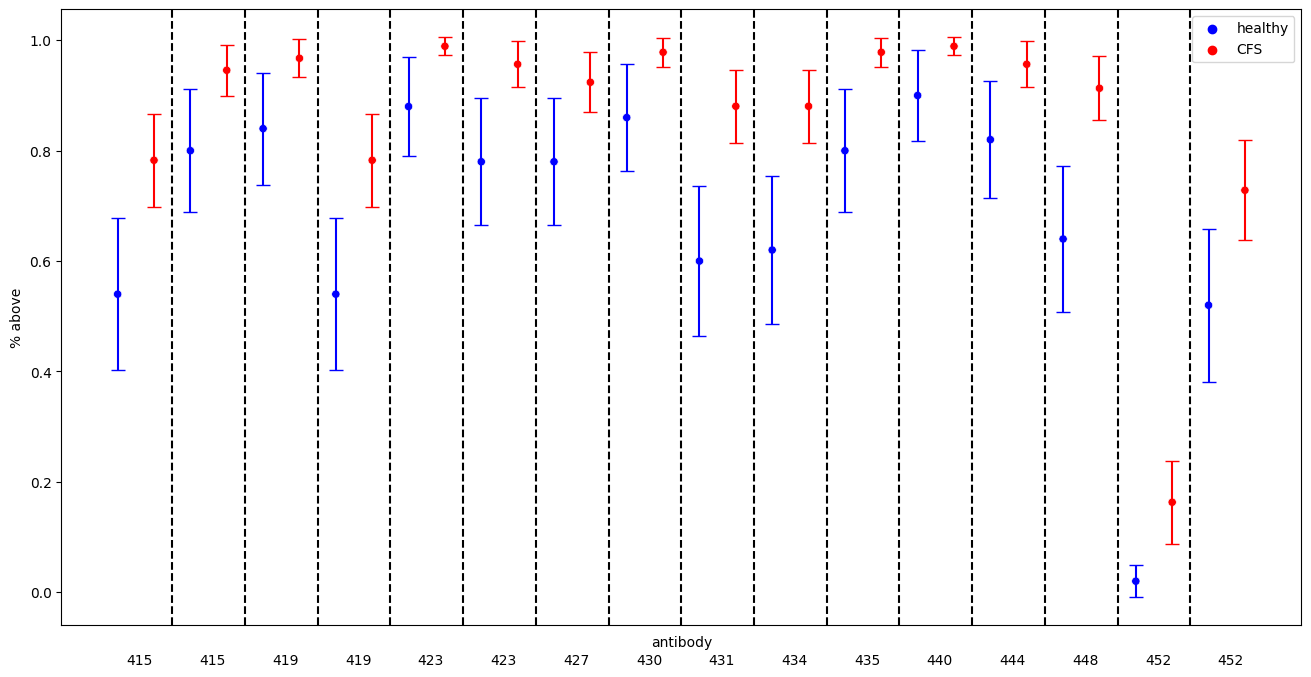

In [13]:
plot_conf_int(smr, 'healthy', 'CFS')

# Multiple testing correction

In [14]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [15]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [16]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [17]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

,ID,Bonferroni,Benjamini-Hochberg,Benjamini-Yekutieli,2-stage Benjamini-Krieger-Yekutieli
0,EBNA1_0415 (AG876),1.106,1.951,1.422,1.930
1,EBNA1_0415 (B95-8),0.595,1.641,1.112,1.620
2,EBNA1_0419 (AG876),0.562,1.641,1.112,1.620
3,"EBNA1_0419 (B95-8, GD1)",1.106,1.951,1.422,1.930
4,EBNA1_0423 (AG876),0.657,1.641,1.112,1.620
5,"EBNA1_0423 (B95-8, GD1)",1.340,2.039,1.510,2.018
6,EBNA1_0427 (GD1),0.349,1.525,0.996,1.504
7,"EBNA1_0430 (AG876, B95-8)",0.584,1.641,1.112,1.620
8,EBNA1_0431 (GD1),2.379,2.680,2.151,2.659
9,"EBNA1_0434 (AG876, B95-8)",1.993,2.470,1.941,2.449


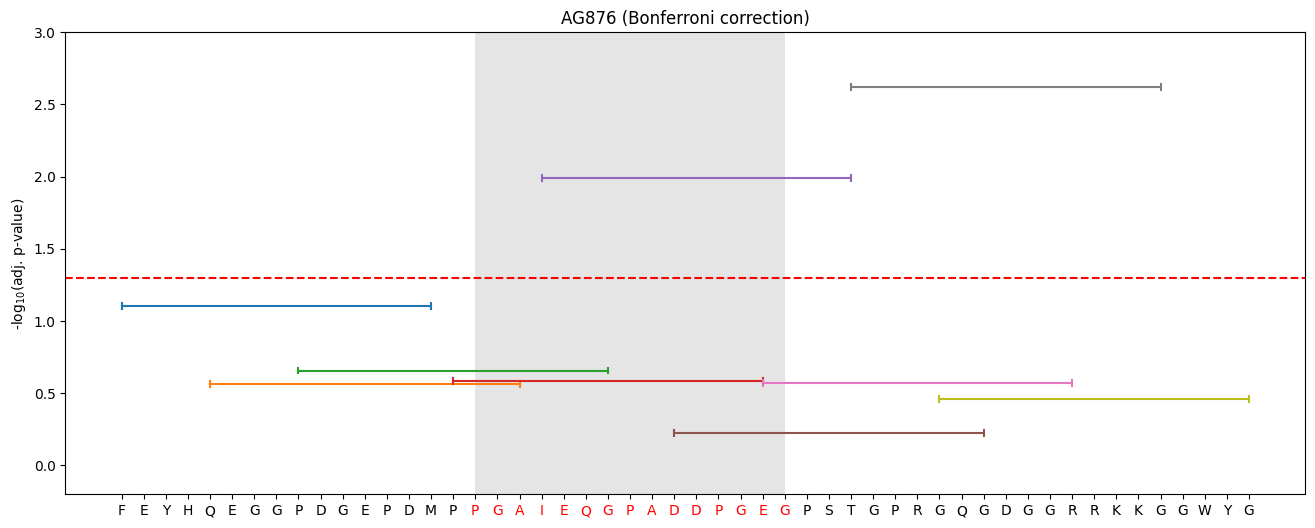

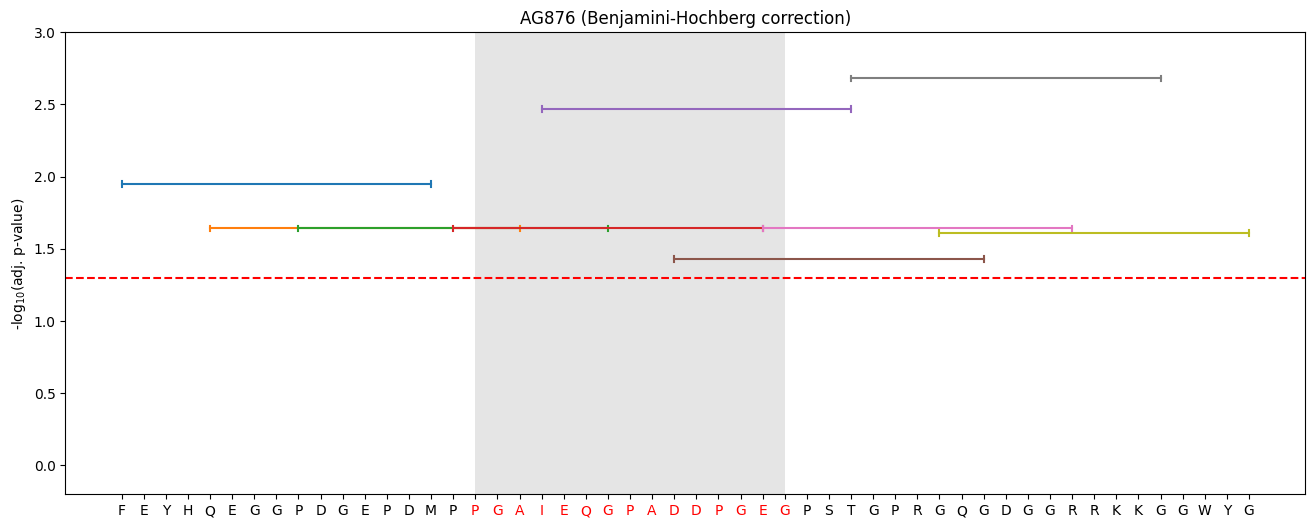

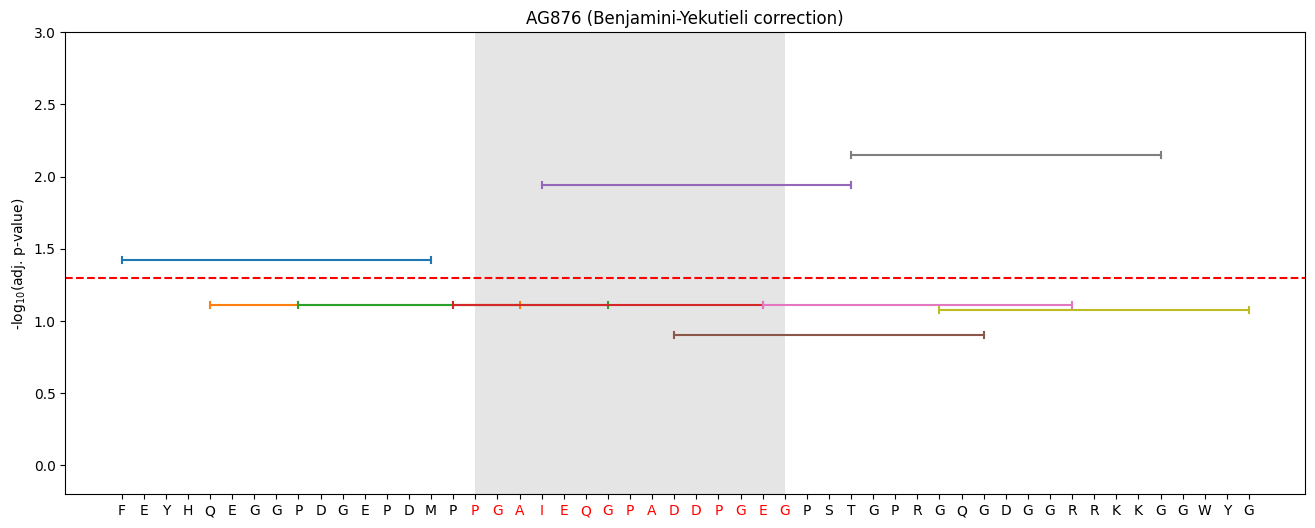

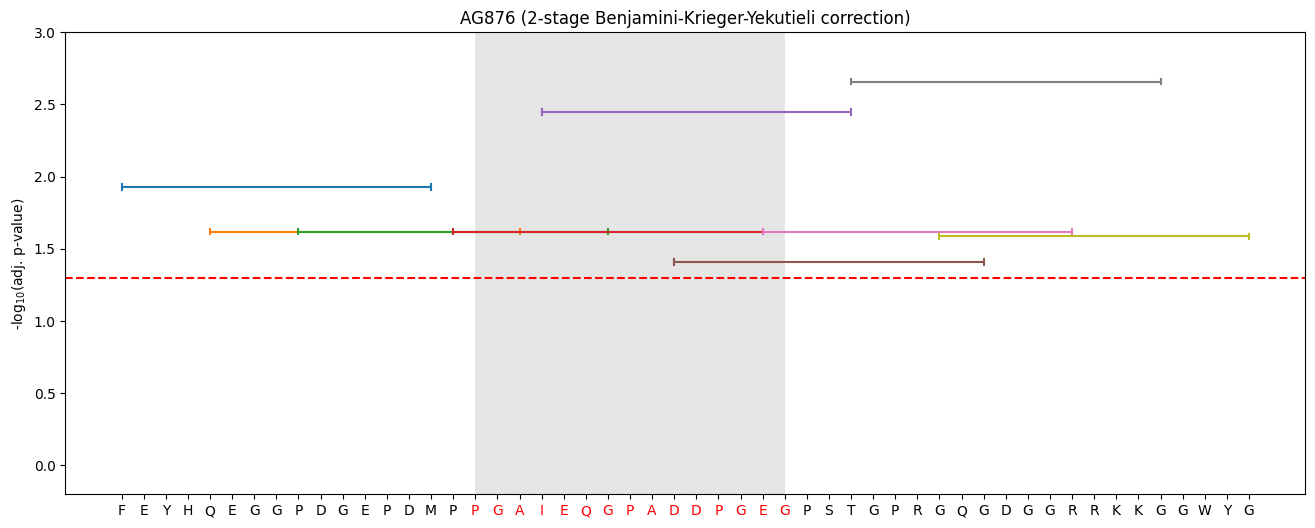

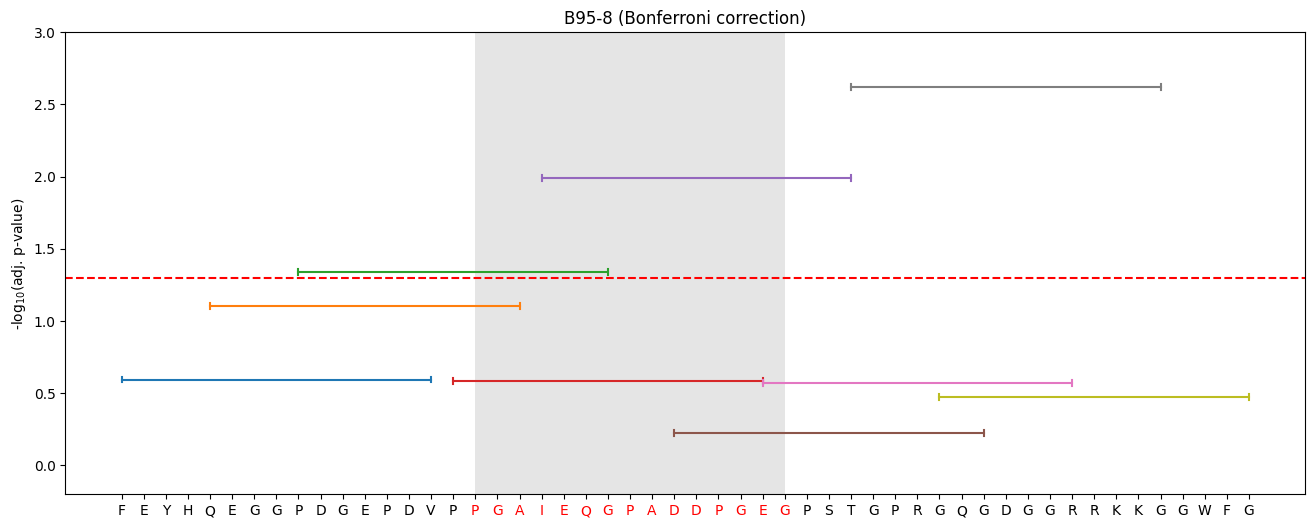

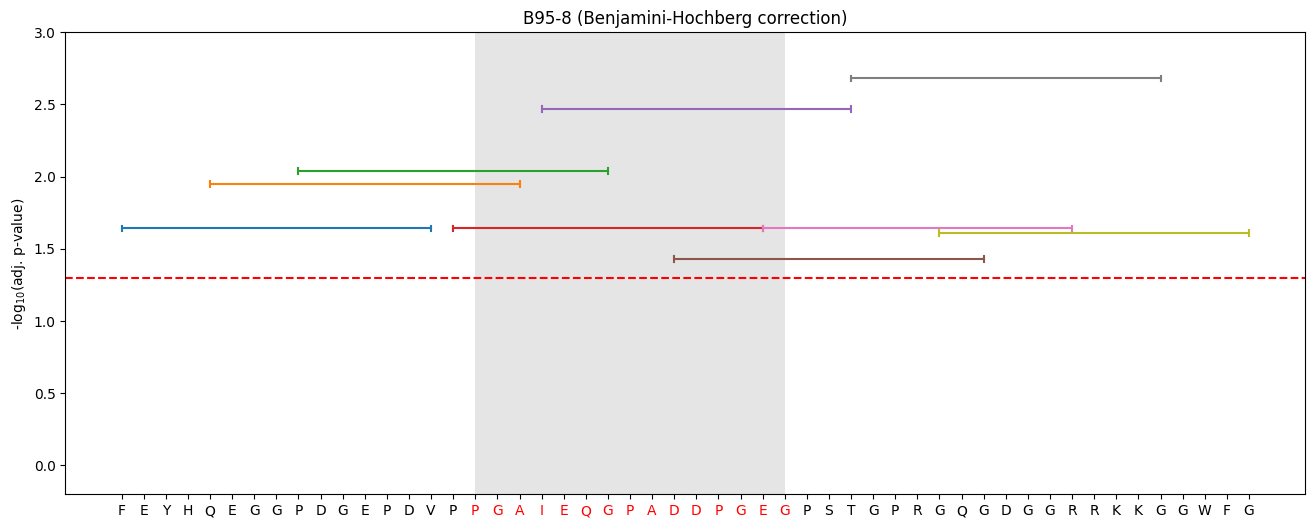

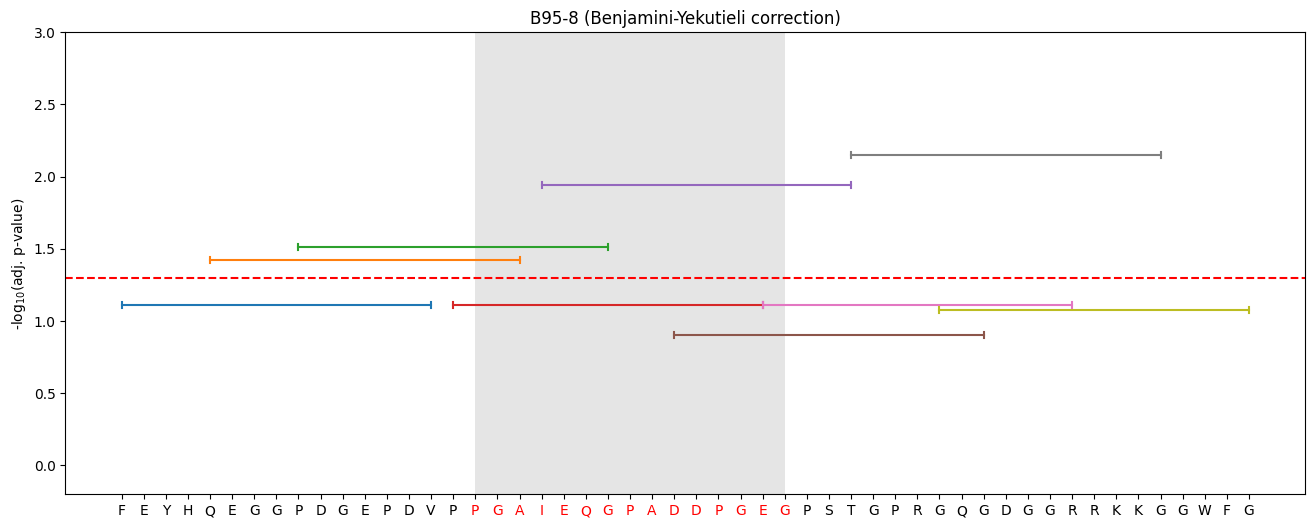

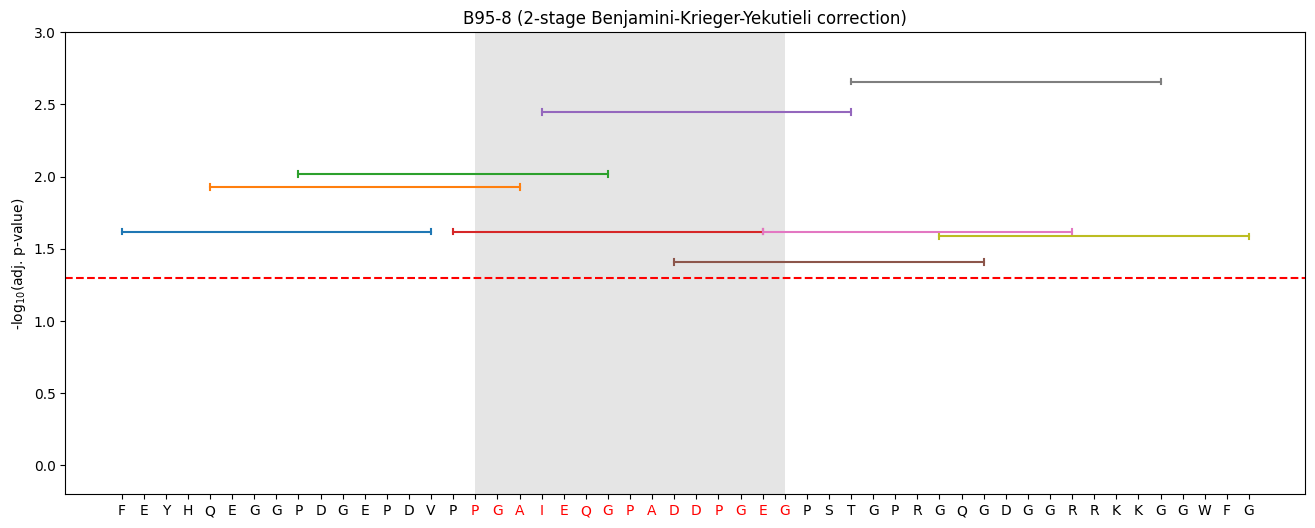

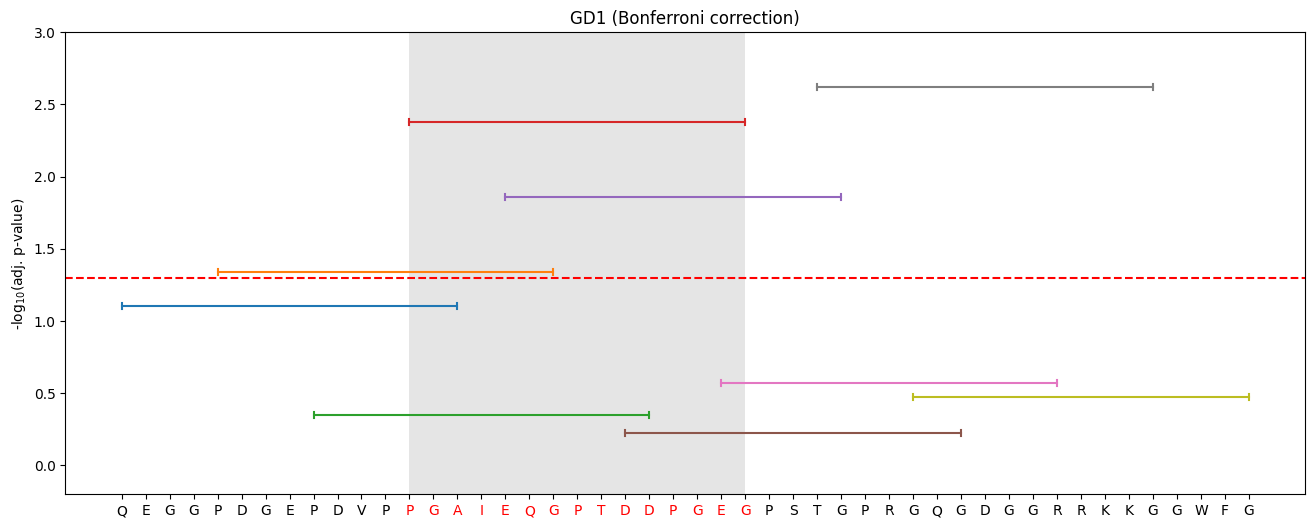

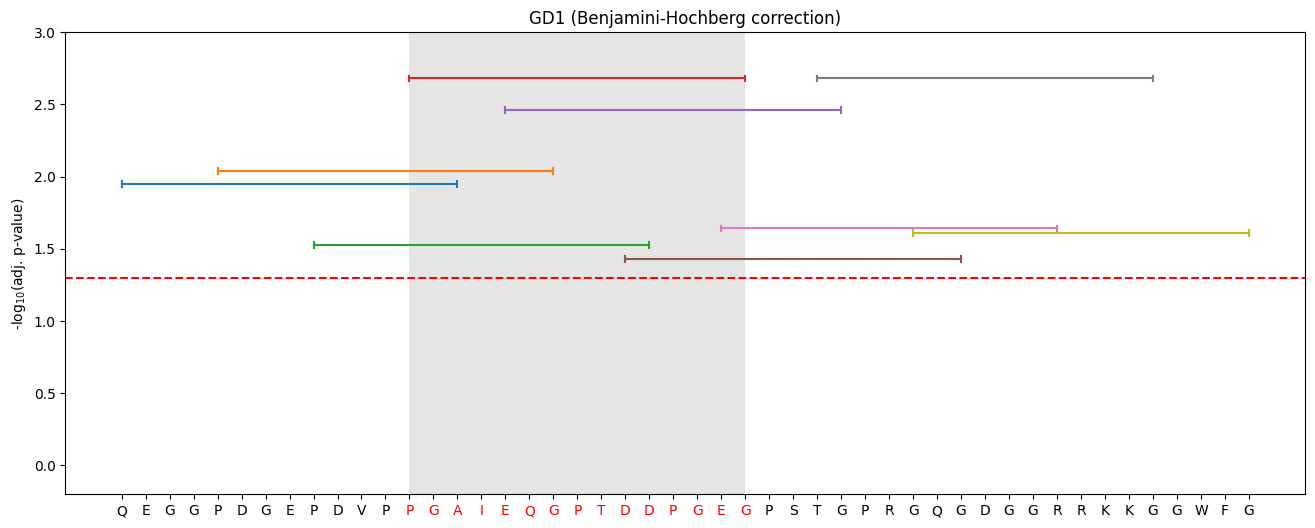

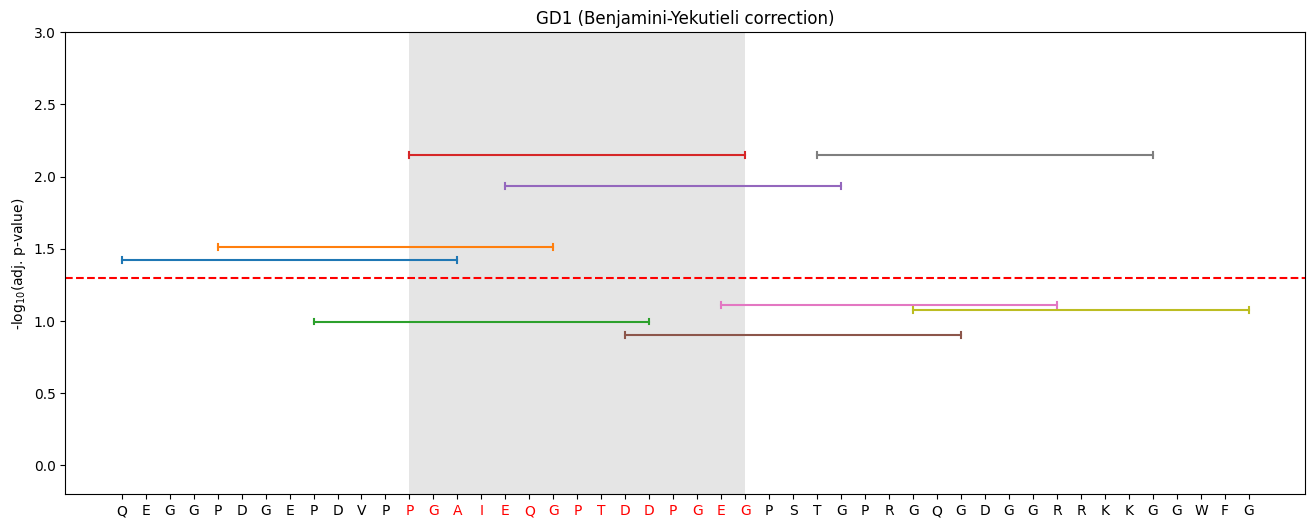

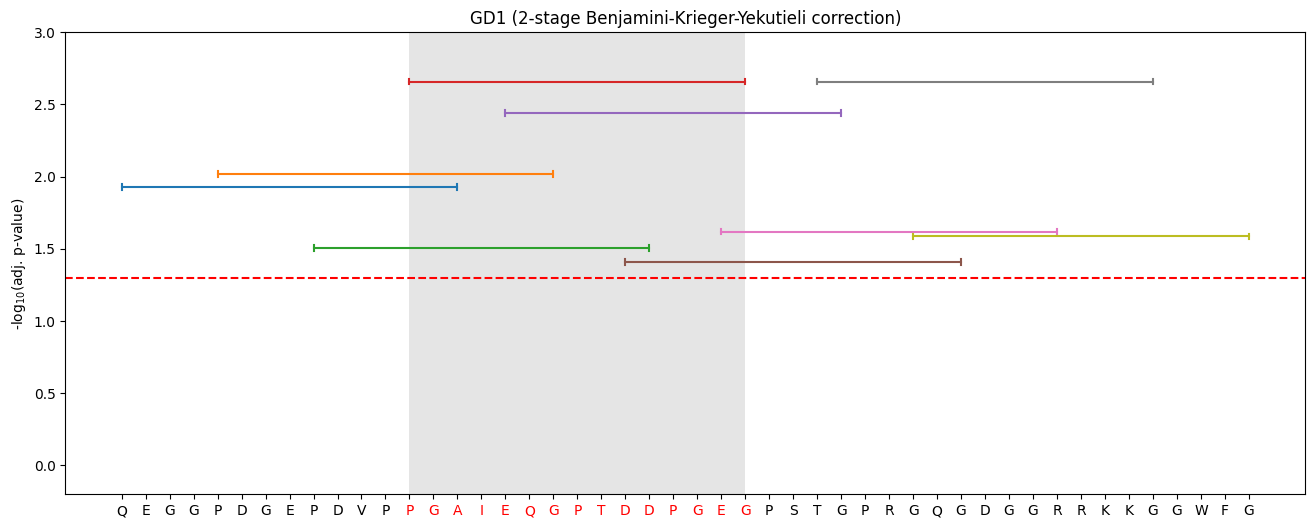

In [18]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])